# Let's get started with the fun part: Exploratory Data Analysis (EDA).

In [ ]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


let's set style for our plots

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

 Loading of CLEANED dataset from the previous

In [ ]:
df = pd.read_csv('/content/netflix_cleaned (1).csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   show_id              8790 non-null   object 
 1   type                 8790 non-null   object 
 2   title                8790 non-null   object 
 3   director             8790 non-null   object 
 4   cast                 8790 non-null   object 
 5   country              8790 non-null   object 
 6   date_added           8790 non-null   object 
 7   release_year         8790 non-null   int64  
 8   rating               8790 non-null   object 
 9   duration             8790 non-null   object 
 10  listed_in            8790 non-null   object 
 11  description          8790 non-null   object 
 12  movie_duration_mins  6126 non-null   float64
 13  tv_show_seasons      2664 non-null   float64
 14  year_added           8790 non-null   int64  
 15  month_added          8790 non-null   i

In [ ]:
print(df.head())

  show_id     type                  title         director                                               cast        country  date_added  release_year rating   duration                                          listed_in                                        description  movie_duration_mins  tv_show_seasons  year_added  month_added
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson                                            Unknown  United States  2021-09-25          2020  PG-13     90 min                                      Documentaries  As her father nears the end of his life, filmm...                 90.0              NaN        2021            9
1      s2  TV Show          Blood & Water          Unknown  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa  2021-09-24          2021  TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries  After crossing paths at a party, a Cape Town t...                  NaN              2.0        2021            

#1) What is the split between Movies and TV Shows?

/tmp/ipython-input-15-492426039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, order=df['type'].value_counts().index, palette='pastel')


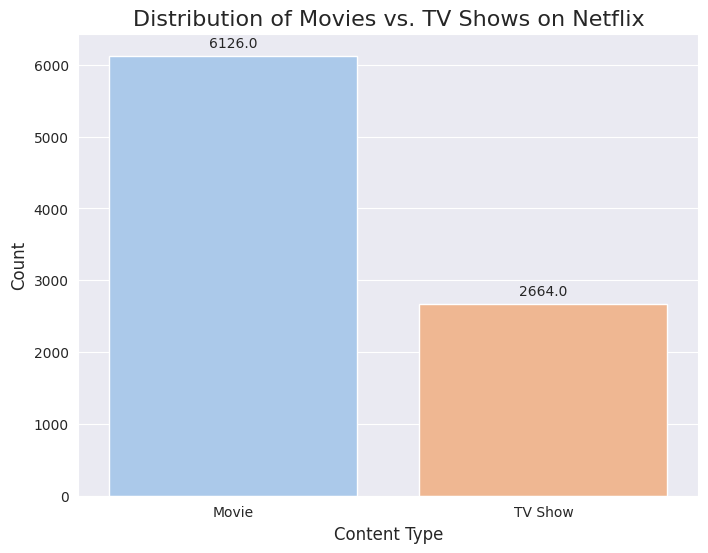

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='type', data=df, order=df['type'].value_counts().index, palette='pastel')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')



plt.title('Distribution of Movies vs. TV Shows on Netflix', fontsize=16)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()




# 2) What are the most common content ratings?

/tmp/ipython-input-16-3389556797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')


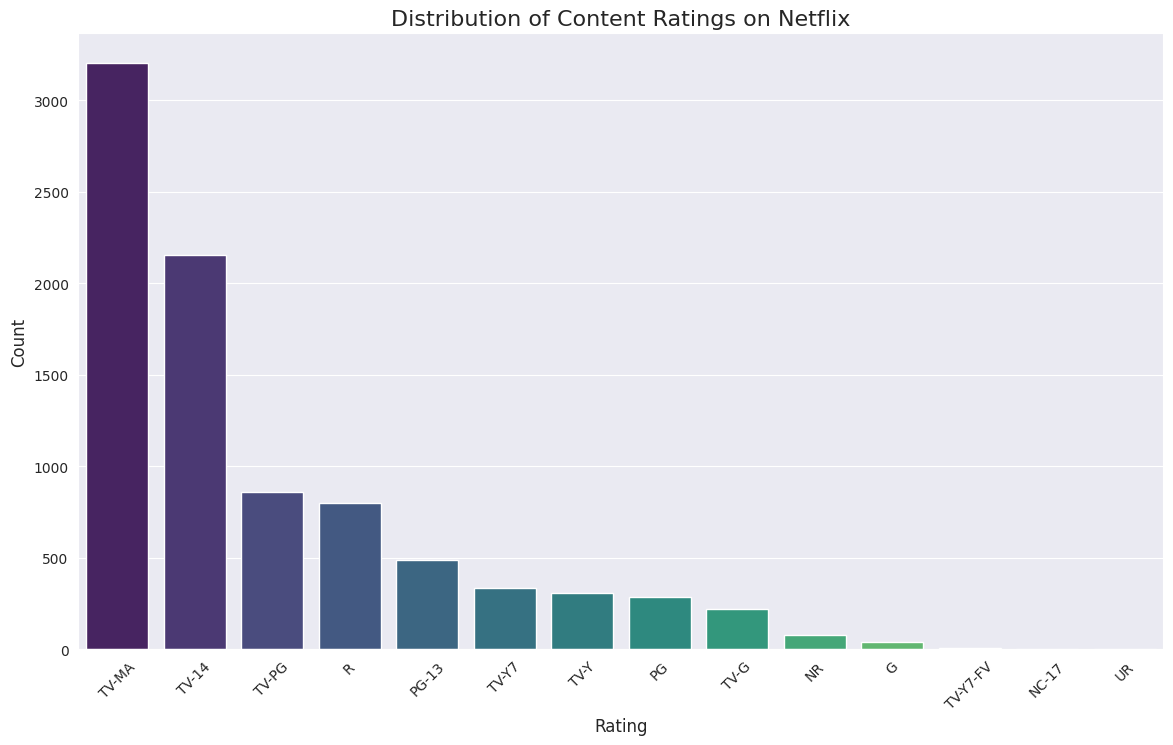

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Content Ratings on Netflix', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

  Insight : The TV-MA (Mature Audience) and TV-14 (Parents Strongly Cautioned) are the most common ratings. This suggests Netflix's primary target is adults and young adults, not children.

# 3) Which genres are most prevalent?

We need to split the 'listed_in' column into individual genres first

In [ ]:
genre_df = df['listed_in'].str.split(', ').explode().to_frame(name='genre')

/tmp/ipython-input-18-1904796892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genre', data=genre_df.reset_index(), order=genre_df['genre'].value_counts().index[:15], palette='mako')


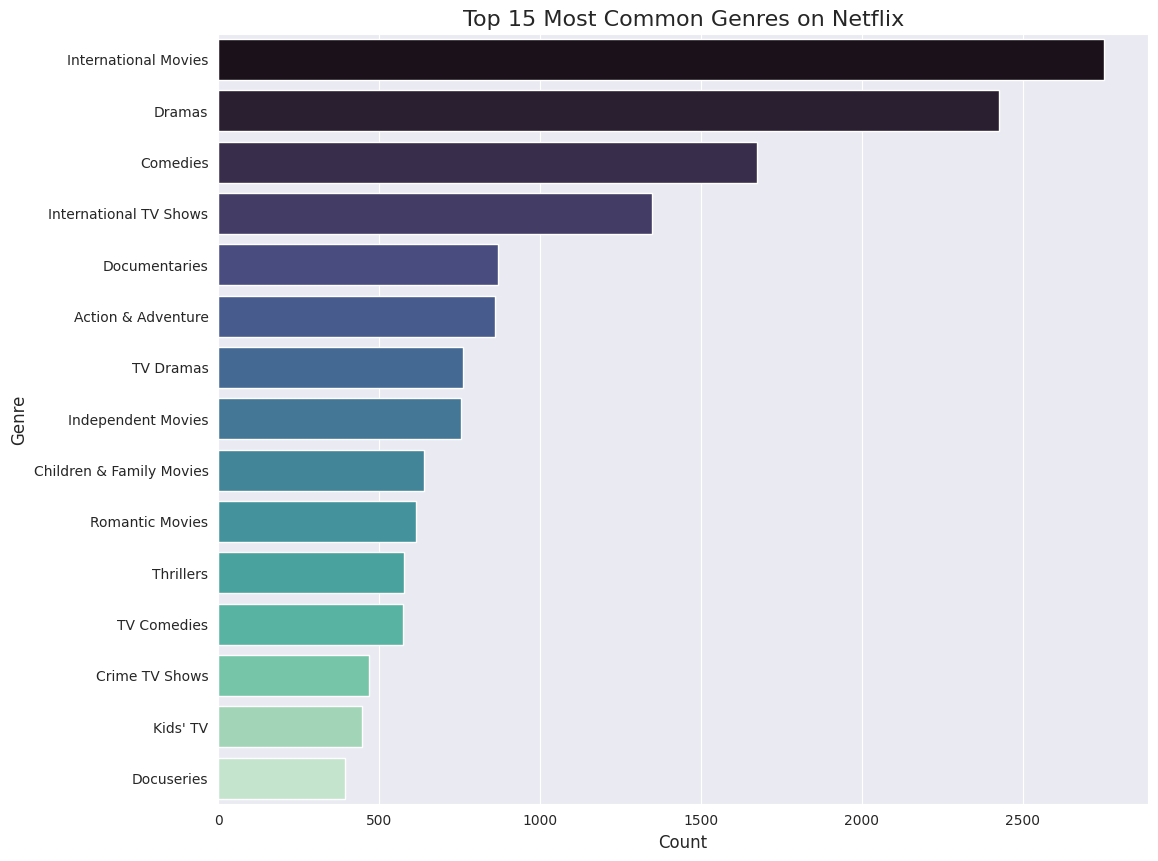

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(y='genre', data=genre_df.reset_index(), order=genre_df['genre'].value_counts().index[:15], palette='mako')
plt.title('Top 15 Most Common Genres on Netflix', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

# 4) How has content addition grown over the years?

In [ ]:
content_added_per_year = df['year_added'].value_counts().sort_index()

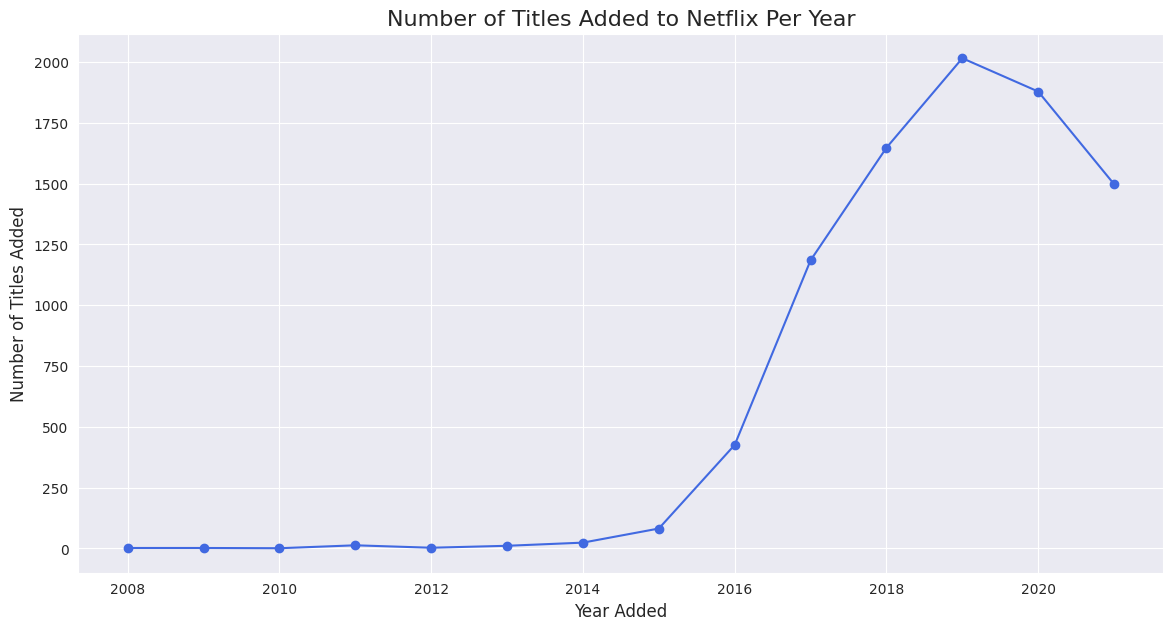

In [ ]:
plt.figure(figsize=(14, 7))
content_added_per_year.plot(kind='line', marker='o', color='royalblue')
plt.title('Number of Titles Added to Netflix Per Year', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.grid(True)
plt.show()

# 5) THE KEY QUESTION: Has the strategy for Movies vs. TV Shows changed over time?

In [ ]:
growth_by_type = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

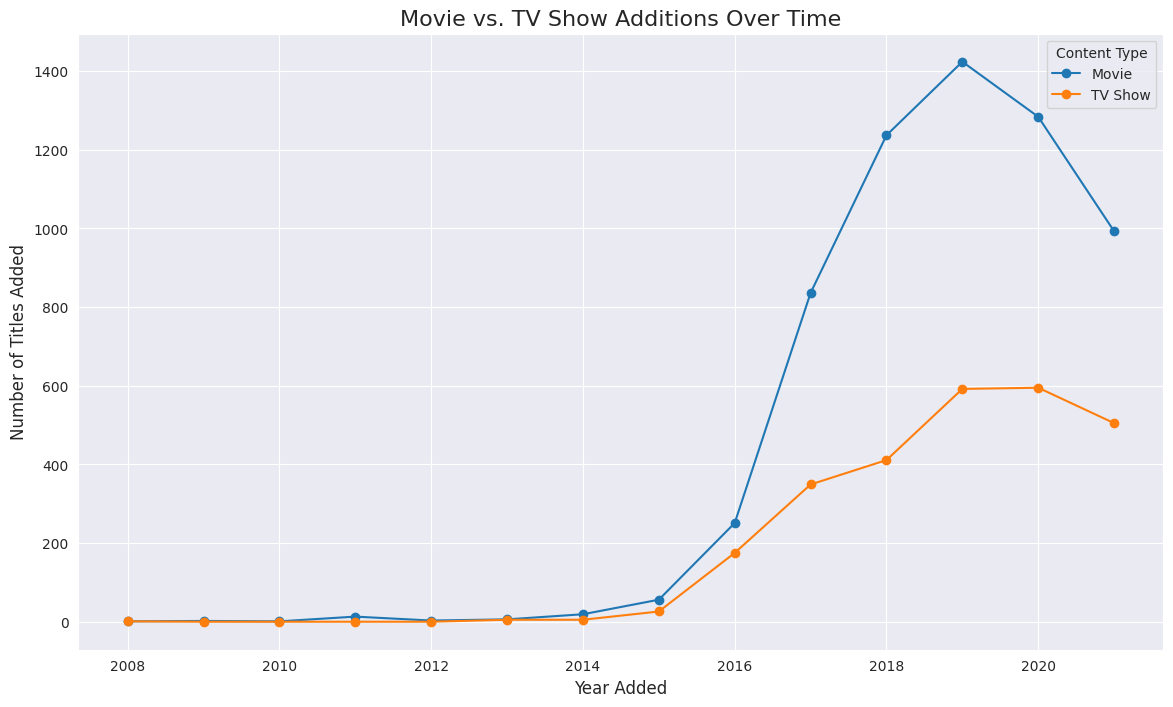

In [ ]:
growth_by_type.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Movie vs. TV Show Additions Over Time', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

# 6) What is the typical duration of a Netflix movie?

In [ ]:
movie_durations = df[df['type'] == 'Movie']['movie_duration_mins']


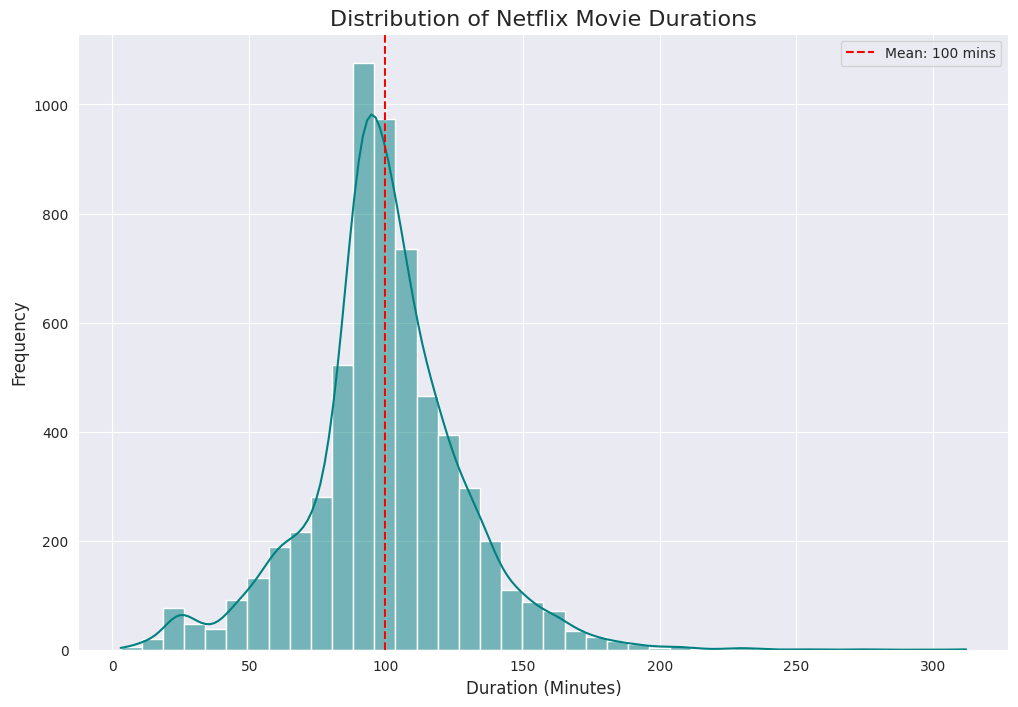

In [ ]:
sns.histplot(movie_durations, bins=40, kde=True, color='teal')
plt.title('Distribution of Netflix Movie Durations', fontsize=16)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(movie_durations.mean(), color='red', linestyle='--', label=f'Mean: {movie_durations.mean():.0f} mins')
plt.legend()
plt.show()

# 7) How many seasons do Netflix TV shows typically have?

In [ ]:
tv_show_seasons = df[df['type'] == 'TV Show']['tv_show_seasons']

/tmp/ipython-input-26-988880918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=tv_show_seasons, order=tv_show_seasons.value_counts().index[:10], palette='magma')


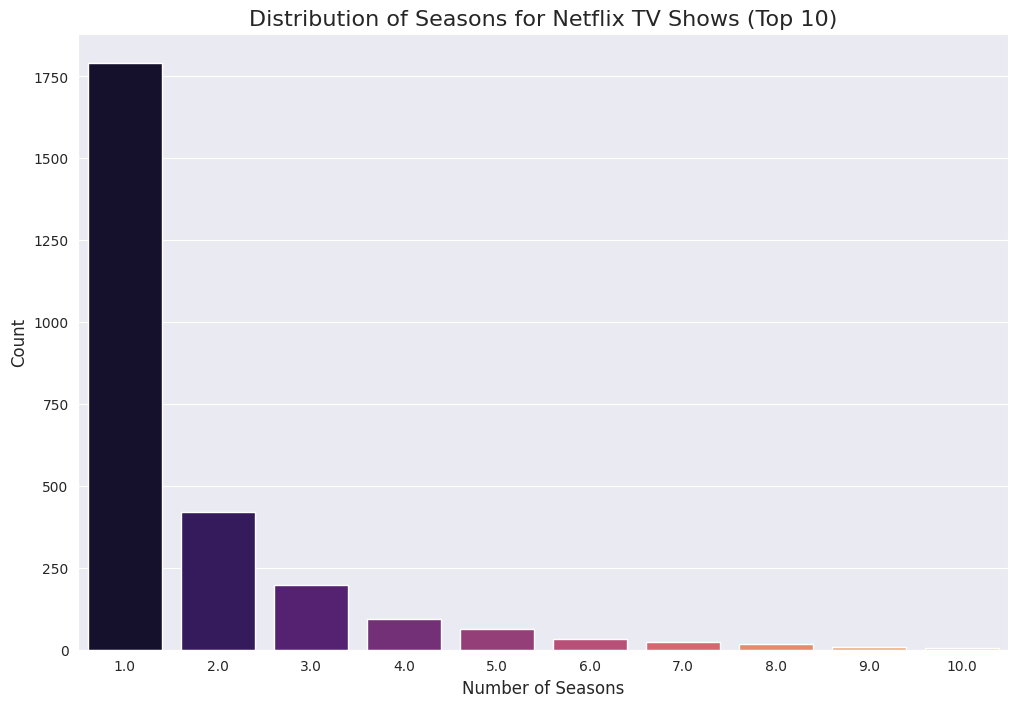

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x=tv_show_seasons, order=tv_show_seasons.value_counts().index[:10], palette='magma')
plt.title('Distribution of Seasons for Netflix TV Shows (Top 10)', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#8) Which countries are the top content producers beyond the USA?

In [ ]:
country_counts = df['country'].str.split(', ').explode().value_counts().reset_index()
country_counts.columns = ['country', 'count']

import plotly.express as px
fig = px.choropleth(country_counts,
                    locations="country",
                    locationmode='country names',
                    color="count",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='<b>Global Distribution of Netflix Content Production</b>')
fig.show()

What is the distribution of ratings (e.g., TV-MA, PG-13) within the most popular genres?

In [ ]:
genre_rating_df = df[['listed_in', 'rating']].copy()
genre_rating_df['genre'] = genre_rating_df['listed_in'].str.split(', ').explode().reset_index(drop=True)

In [ ]:
cross_tab = pd.crosstab(genre_rating_df['genre'], genre_rating_df['rating'])

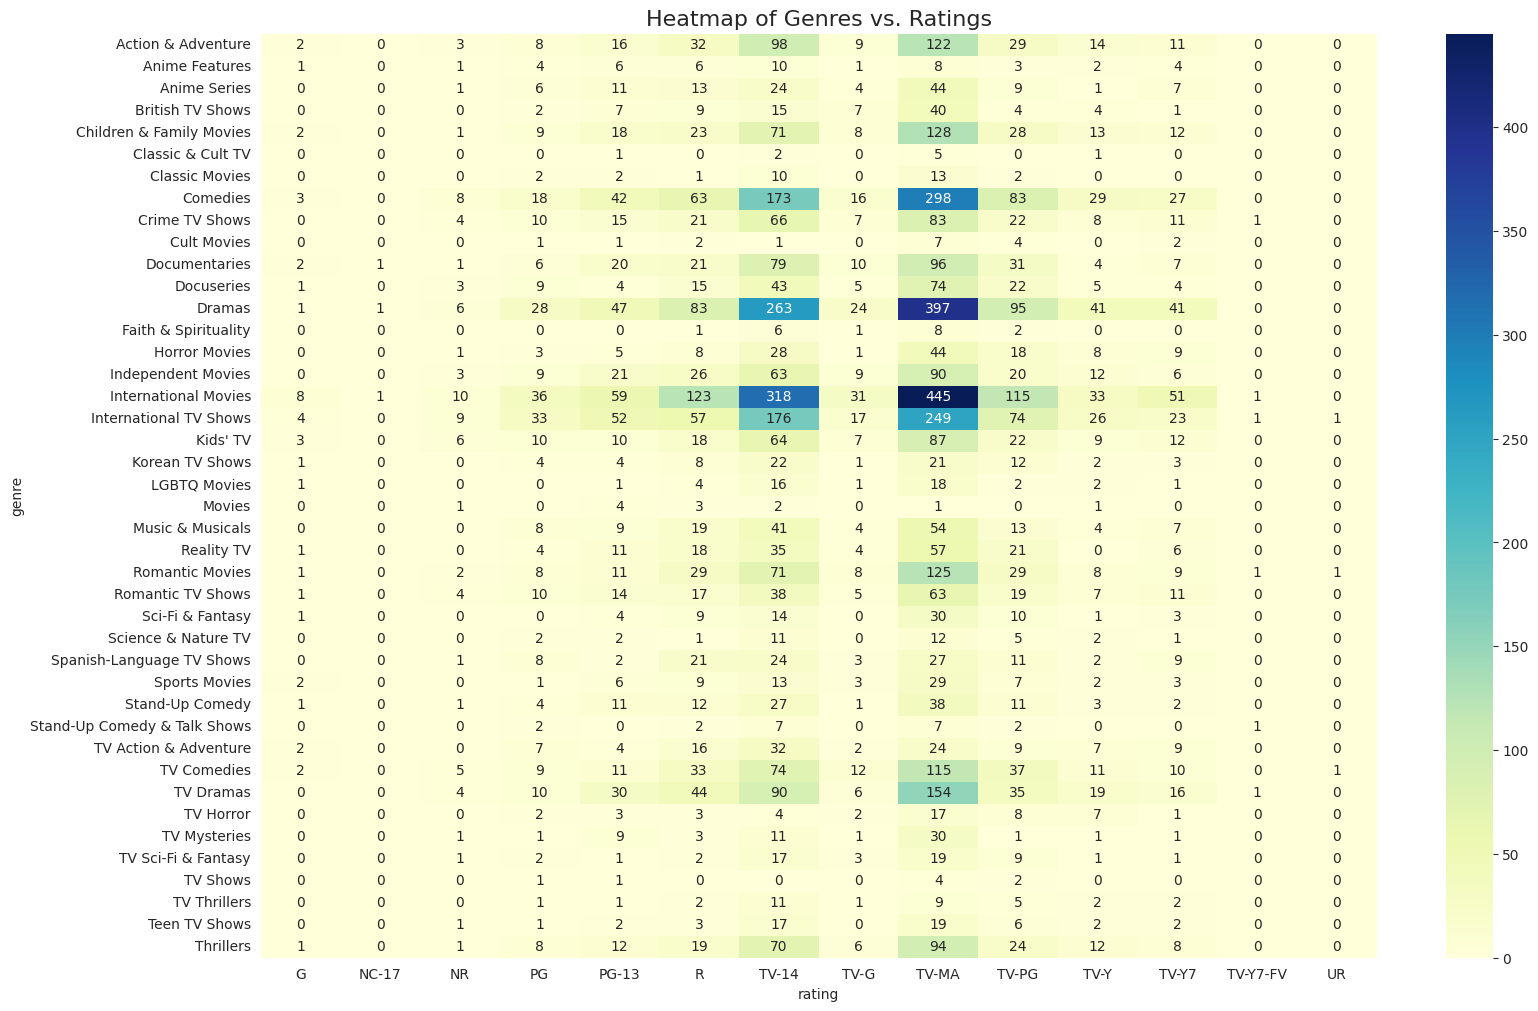

In [ ]:
plt.figure(figsize=(18, 12))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Genres vs. Ratings', fontsize=16)
plt.show()